# Svenska data om Covid-19

Informationen nedan bygger på Folkhälsomyndighetens samlade data om Covid-19 och dess spridning i Sverige.

# Kodbibliotek



In [23]:
import requests, io
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Datakällor

Folkhälsomyndigheten (FHM) uppdaterar data om antal fall, döda och intensivvårdade varje dag 11:30 och dessa finns tillgängliga från 14:00. Datan bygger på inrapporterade fall och uppdateras bakåt i tiden, vilket innebär att data perdatum även uppdateras bakåt.

In [24]:
fhmdata = requests.get('https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data')

# Funktioner

In [25]:
def fhmregional(excelfile):
    '''Function to turn excelsheet about regional data into dataframe.'''
    
    fhmregional = pd.read_excel(excelfile, sheet_name=0)
    fhmregional.rename(columns={'Statistikdatum':'Datum', 
                                'Totalt_antal_fall':'Totalt antal fall', 
                                'Jämtland_Härjedalen':'Jämtland Härjedalen', 
                                'Västra_Götaland':'Västra Götaland'}, inplace=True)
    fhmregional.set_index('Datum', inplace=True)
    
    
    return fhmregional


def fhmtotal(excelfile):
    '''Function to turn excelsheet about daily deaths to covid-19 into dataframe. 
    Removes row about unknown cases.'''
        
    fhmtotal = pd.read_excel(excelfile, sheet_name=1)
    fhmtotal.rename(columns={'Datum_avliden':'Datum', 
                             'Antal_avlidna':'Antal avlidna'}, inplace=True)
    fhmtotal.drop(index=len(fhmtotal) - 1, inplace=True) # Remove row 'Uppgift saknas'
    fhmtotal['Datum'] = pd.to_datetime(fhmtotal['Datum'], errors='ignore').dt.normalize()
    fhmtotal.set_index('Datum', inplace=True)
    
    
    return fhmtotal


def fhmivo(excelfile):
    '''Function to turn excelsheet about patients in intensivecare to dataframe.'''
    
    fhmivo = pd.read_excel(excelfile, sheet_name=2)
    fhmivo.rename(columns={'Datum_vårdstart':'Datum', 
                           'Antal_intensivvårdade':'Intensivvårdade'}, inplace=True)
    
    fhmivo.set_index('Datum', inplace=True)
    
    return fhmivo


def fhmregtot(excelfile):
    '''Function to turn excelsheet about total number divided by region into dataframe'''
    
    fhmregtot = pd.read_excel(excelfile, sheet_name=3)
    fhmregtot.set_index('Region', inplace=True)
    fhmregtot.rename(columns={'Totalt_antal_fall':'Totalt antal fall', 
                              'Fall_per_100000_inv':'Fall per 100 000 invånare', 
                              'Totalt_antal_intensivvårdade':'Intensivvårdade', 
                              'Totalt_antal_avlidna':'Avlidna'}, inplace=True)
    
    return fhmregtot


def fhmkon(excelfile):
    '''Funtion to turn excelsheet about total numbers divided by sex into dataframe.'''
    
    fhmkon = pd.read_excel(excelfile, sheet_name=4)
    fhmkon.rename(columns={'Totalt_antal_fall':'Totalt antal fall', 
                           'Totalt_antal_intensivvårdade':'Intensivvårdade', 
                           'Totalt_antal_avlidna':'Avlidna'}, inplace=True)
    fhmkon.set_index('Kön', inplace=True)
    
    
    return fhmkon


def fhmage(excelfile):
    '''Some text'''
    
    fhmage = pd.read_excel(excelfile, sheet_name=5)
    fhmage.rename(columns={'Totalt_antal_fall':'Totalt antal fall', 
                           'Totalt_antal_intensivvårdade':'Intensivvårdade', 
                           'Totalt_antal_avlidna':'Avlidna'}, inplace=True)
    fhmage.replace(to_replace=r'^Ålder_', value='', regex=True, inplace=True)
    fhmage.replace(to_replace=r'_', value='-', regex=True, inplace=True)
    fhmage.set_index('Åldersgrupp', inplace=True)
    
    return fhmage

Skapa variabler av datan:

In [26]:
with io.BytesIO(fhmdata.content) as excelfile:
    regional = fhmregional(excelfile)
    total = fhmtotal(excelfile)
    ivo = fhmivo(excelfile)
    regtot = fhmregtot(excelfile)
    kon = fhmkon(excelfile)
    age = fhmage(excelfile)

# Grafer och tabeller

Nedan är grafer och tabeller framtagna med hjälp av datan från folkhälsomyndigheten.

## Avlidna per dag

Datan nedan saknar raden "Uppgift saknas" för fall där information om datum saknas.

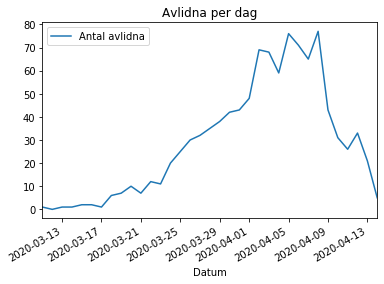

In [27]:
total.plot(title='Avlidna per dag', x_compat=True)

In [28]:
total

,Antal avlidna
Datum,
2020-03-11,1
2020-03-12,0
2020-03-13,1
2020-03-14,1
2020-03-15,2
2020-03-16,2
2020-03-17,1
2020-03-18,6
2020-03-19,7


## Antal fall per datum och region

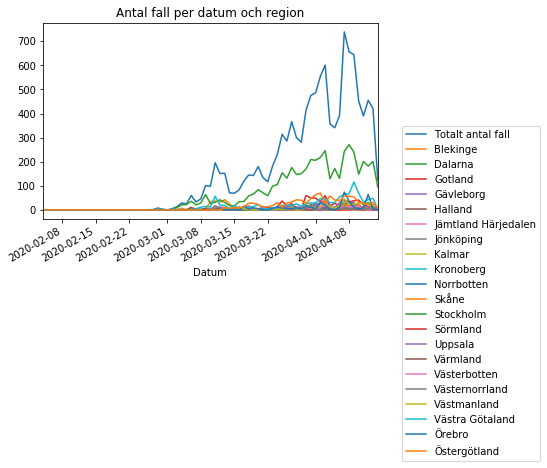

In [29]:
regional.plot(title='Antal fall per datum och region', x_compat=True).legend(loc='upper right', bbox_to_anchor=(1.5, 0.5))

In [30]:
regional

,Totalt antal fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland Härjedalen,Jönköping,Kalmar,Kronoberg,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra Götaland,Örebro,Östergötland
Datum,,,,,,,,,,,,,,,,,,,,,
2020-02-04,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


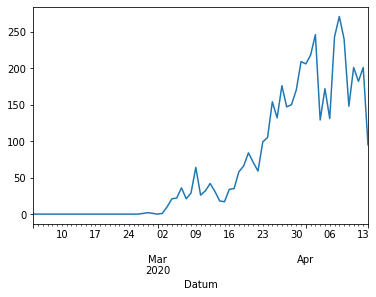

In [31]:
regional['Stockholm'].plot()

## Antal intensivvårdade per dag

Datan utgår från dag då vård startades.

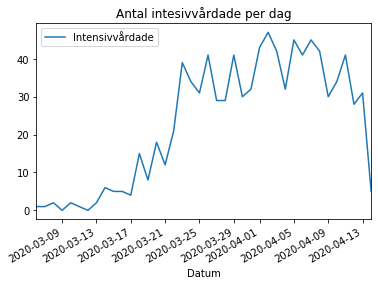

In [32]:
ivo.plot(title='Antal intesivvårdade per dag', x_compat=True)

In [33]:
ivo

,Intensivvårdade
Datum,
2020-03-06,1
2020-03-07,1
2020-03-08,2
2020-03-09,0
2020-03-10,2
2020-03-11,1
2020-03-12,0
2020-03-13,2
2020-03-14,6


## Regional data

In [34]:
regtot

,Totalt antal fall,Fall per 100 000 invånare,Intensivvårdade,Avlidna
Region,,,,
Blekinge,42,26.314800,3,2
Dalarna,365,126.751076,29,43
Gotland,16,26.806957,2,0
Gävleborg,301,104.738640,21,33
Halland,189,56.612591,15,16
Jämtland Härjedalen,137,104.732056,4,0
Jönköping,355,97.635033,29,33
Kalmar,79,32.186306,9,5
Kronoberg,104,51.620846,3,1


In [35]:
region = 'Blekinge'

## Data föredelat på kön

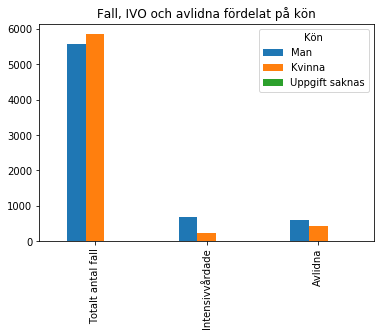

In [36]:
kon.T.plot.bar(title='Fall, IVO och avlidna fördelat på kön')

In [37]:
kon

,Totalt antal fall,Intensivvårdade,Avlidna
Kön,,,
Man,5586,688,594
Kvinna,5857,227,439
Uppgift saknas,2,0,0


## Data fördelat på åldersgrupper

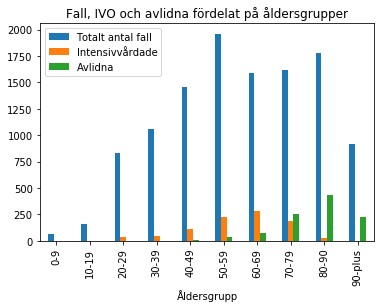

In [38]:
age.drop('Uppgift saknas').plot(title='Fall, IVO och avlidna fördelat på åldersgrupper', kind ='bar')

In [39]:
age

,Totalt antal fall,Intensivvårdade,Avlidna
Åldersgrupp,,,
0-9,64,2,0
10-19,162,0,0
20-29,833,37,3
30-39,1057,43,2
40-49,1460,113,7
50-59,1961,223,36
60-69,1590,279,76
70-79,1617,188,256
80-90,1778,29,430
